BIT has conducted a Randomised Controlled Trial involving 1000s of participants looking into the effects of calorie labels on what people order in food delivery apps (like JustEat). The data is promising, it seems various types of labels lead to healthier food choices. The client however is worried that while the effects overall are promising, this may not be true for everyone in the population. Alongside food choices, we also collected demographic data as well as some data on past dietary behaviour. Describe a data scientific method that will help the client understand better for whom the trial may work and for whom it might not and how you would communicate the results to the client. Also discuss how you would communicate the limitations and risks of your approach.

Let's generate some mock data for this task. We'll create a dataset with demographic information, past dietary behavior, and food choices based on different types of calorie labels. We'll consider variables such as age, gender, income, past consumption of healthy foods, and the chosen food option with different calorie labels.

In [44]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Mock data for participants
num_participants = 1000
participant_ids = range(1, num_participants + 1)
ages = np.random.randint(18, 65, size=num_participants)
genders = np.random.choice(['Male', 'Female'], size=num_participants)
incomes = np.random.normal(50000, 15000, size=num_participants).round(2)  # Generating random income values


# Calorie label types
calorie_label_types = ['Standard', 'Low-Calorie', 'No-Calorie']

# Food choices based on calorie labels
calorie_labels = np.random.choice(calorie_label_types, size=num_participants)

# Creating DataFrame
df = pd.DataFrame({
    'ParticipantID': participant_ids,
    'Age': ages,
    'Gender': genders,
    'Income': incomes,
    'Labels': calorie_labels
})

# Generating continuous values for 3 days' worth of calorie data for food orders
calorie_ranges = {'Low': (200, 500),
                  'Medium': (500, 800),
                  'High': (800, 1100)}

# Initialize columns for each day
df['Day1_Calories'] = 0
df['Day2_Calories'] = 0
df['Day3_Calories'] = 0

# Calculate the number of participants for each category
num_low = int(0.25 * num_participants)
num_medium = int(0.25 * num_participants)
num_high = int(0.5 * num_participants)

# Assign random values for low category for each day
low_indices = np.random.choice(range(num_participants), size=(num_low,), replace=False)
df.loc[low_indices, 'Day1_Calories'] = np.random.uniform(*calorie_ranges['Low'], size=num_low).round(2)
df.loc[low_indices, 'Day2_Calories'] = np.random.uniform(*calorie_ranges['Low'], size=num_low).round(2)
df.loc[low_indices, 'Day3_Calories'] = np.random.uniform(*calorie_ranges['Low'], size=num_low).round(2)

# Assign random values for medium category for each day
medium_indices = np.random.choice(list(set(range(num_participants)) - set(low_indices)), size=(num_medium,), replace=False)
df.loc[medium_indices, 'Day1_Calories'] = np.random.uniform(*calorie_ranges['Medium'], size=num_medium).round(2)
df.loc[medium_indices, 'Day2_Calories'] = np.random.uniform(*calorie_ranges['Medium'], size=num_medium).round(2)
df.loc[medium_indices, 'Day3_Calories'] = np.random.uniform(*calorie_ranges['Medium'], size=num_medium).round(2)

# Assign random values for high category for each day
high_indices = np.random.choice(list(set(range(num_participants)) - set(low_indices) - set(medium_indices)), size=(num_high,), replace=False)
df.loc[high_indices, 'Day1_Calories'] = np.random.uniform(*calorie_ranges['High'], size=num_high).round(2)
df.loc[high_indices, 'Day2_Calories'] = np.random.uniform(*calorie_ranges['High'], size=num_high).round(2)
df.loc[high_indices, 'Day3_Calories'] = np.random.uniform(*calorie_ranges['High'], size=num_high).round(2)

# Adding continuous values for 'FoodChoiceCalories'
df['FoodChoiceCalories'] = np.random.uniform(200, 1100, size=num_participants).round(2)

# Conditionally changing 'FoodChoiceCalories' based on criteria
young_women_condition = (df['Gender'] == 'Female') & (df['Age'] < 30) & (df['Day1_Calories'] > 700)
df.loc[young_women_condition, 'FoodChoiceCalories'] = np.random.uniform(200, 500, size=sum(young_women_condition)).round(2)



# Displaying the modified DataFrame
print(df.head())

   ParticipantID  Age  Gender    Income       Labels  Day1_Calories  \
0              1   56    Male  41672.01  Low-Calorie         489.15   
1              2   46  Female  78217.36   No-Calorie         921.74   
2              3   32  Female  28279.79     Standard         923.40   
3              4   60  Female  17017.91   No-Calorie        1071.81   
4              5   25    Male  56600.22     Standard         425.44   

   Day2_Calories  Day3_Calories  FoodChoiceCalories  
0         340.86         207.39              230.19  
1         905.81         824.32              704.36  
2         936.69         951.09              825.34  
3        1061.85         996.43              916.21  
4         240.71         419.26              506.19  


### Cleanup and exploratory analysis

First I explore whether thera are any NaN values and how my variables are distributed.
There is a debate whether to split first or do EDA first
A bit of EDA before, yes. Rigorous feature engineering? After.

In [26]:
df.info()
# alternative way to find na df.columns[df.isna().any()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ParticipantID       1000 non-null   int64  
 1   Age                 1000 non-null   int32  
 2   Gender              1000 non-null   object 
 3   Income              1000 non-null   float64
 4   Labels              1000 non-null   object 
 5   Day1_Calories       1000 non-null   float64
 6   Day2_Calories       1000 non-null   float64
 7   Day3_Calories       1000 non-null   float64
 8   FoodChoiceCalories  1000 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(2)
memory usage: 66.5+ KB


"\nsns.histplot(df['Age'], bins=30)\nplt.title('Distribution of Age')\nplt.xlabel('Age')\nplt.ylabel('Count')\nplt.show()\n"

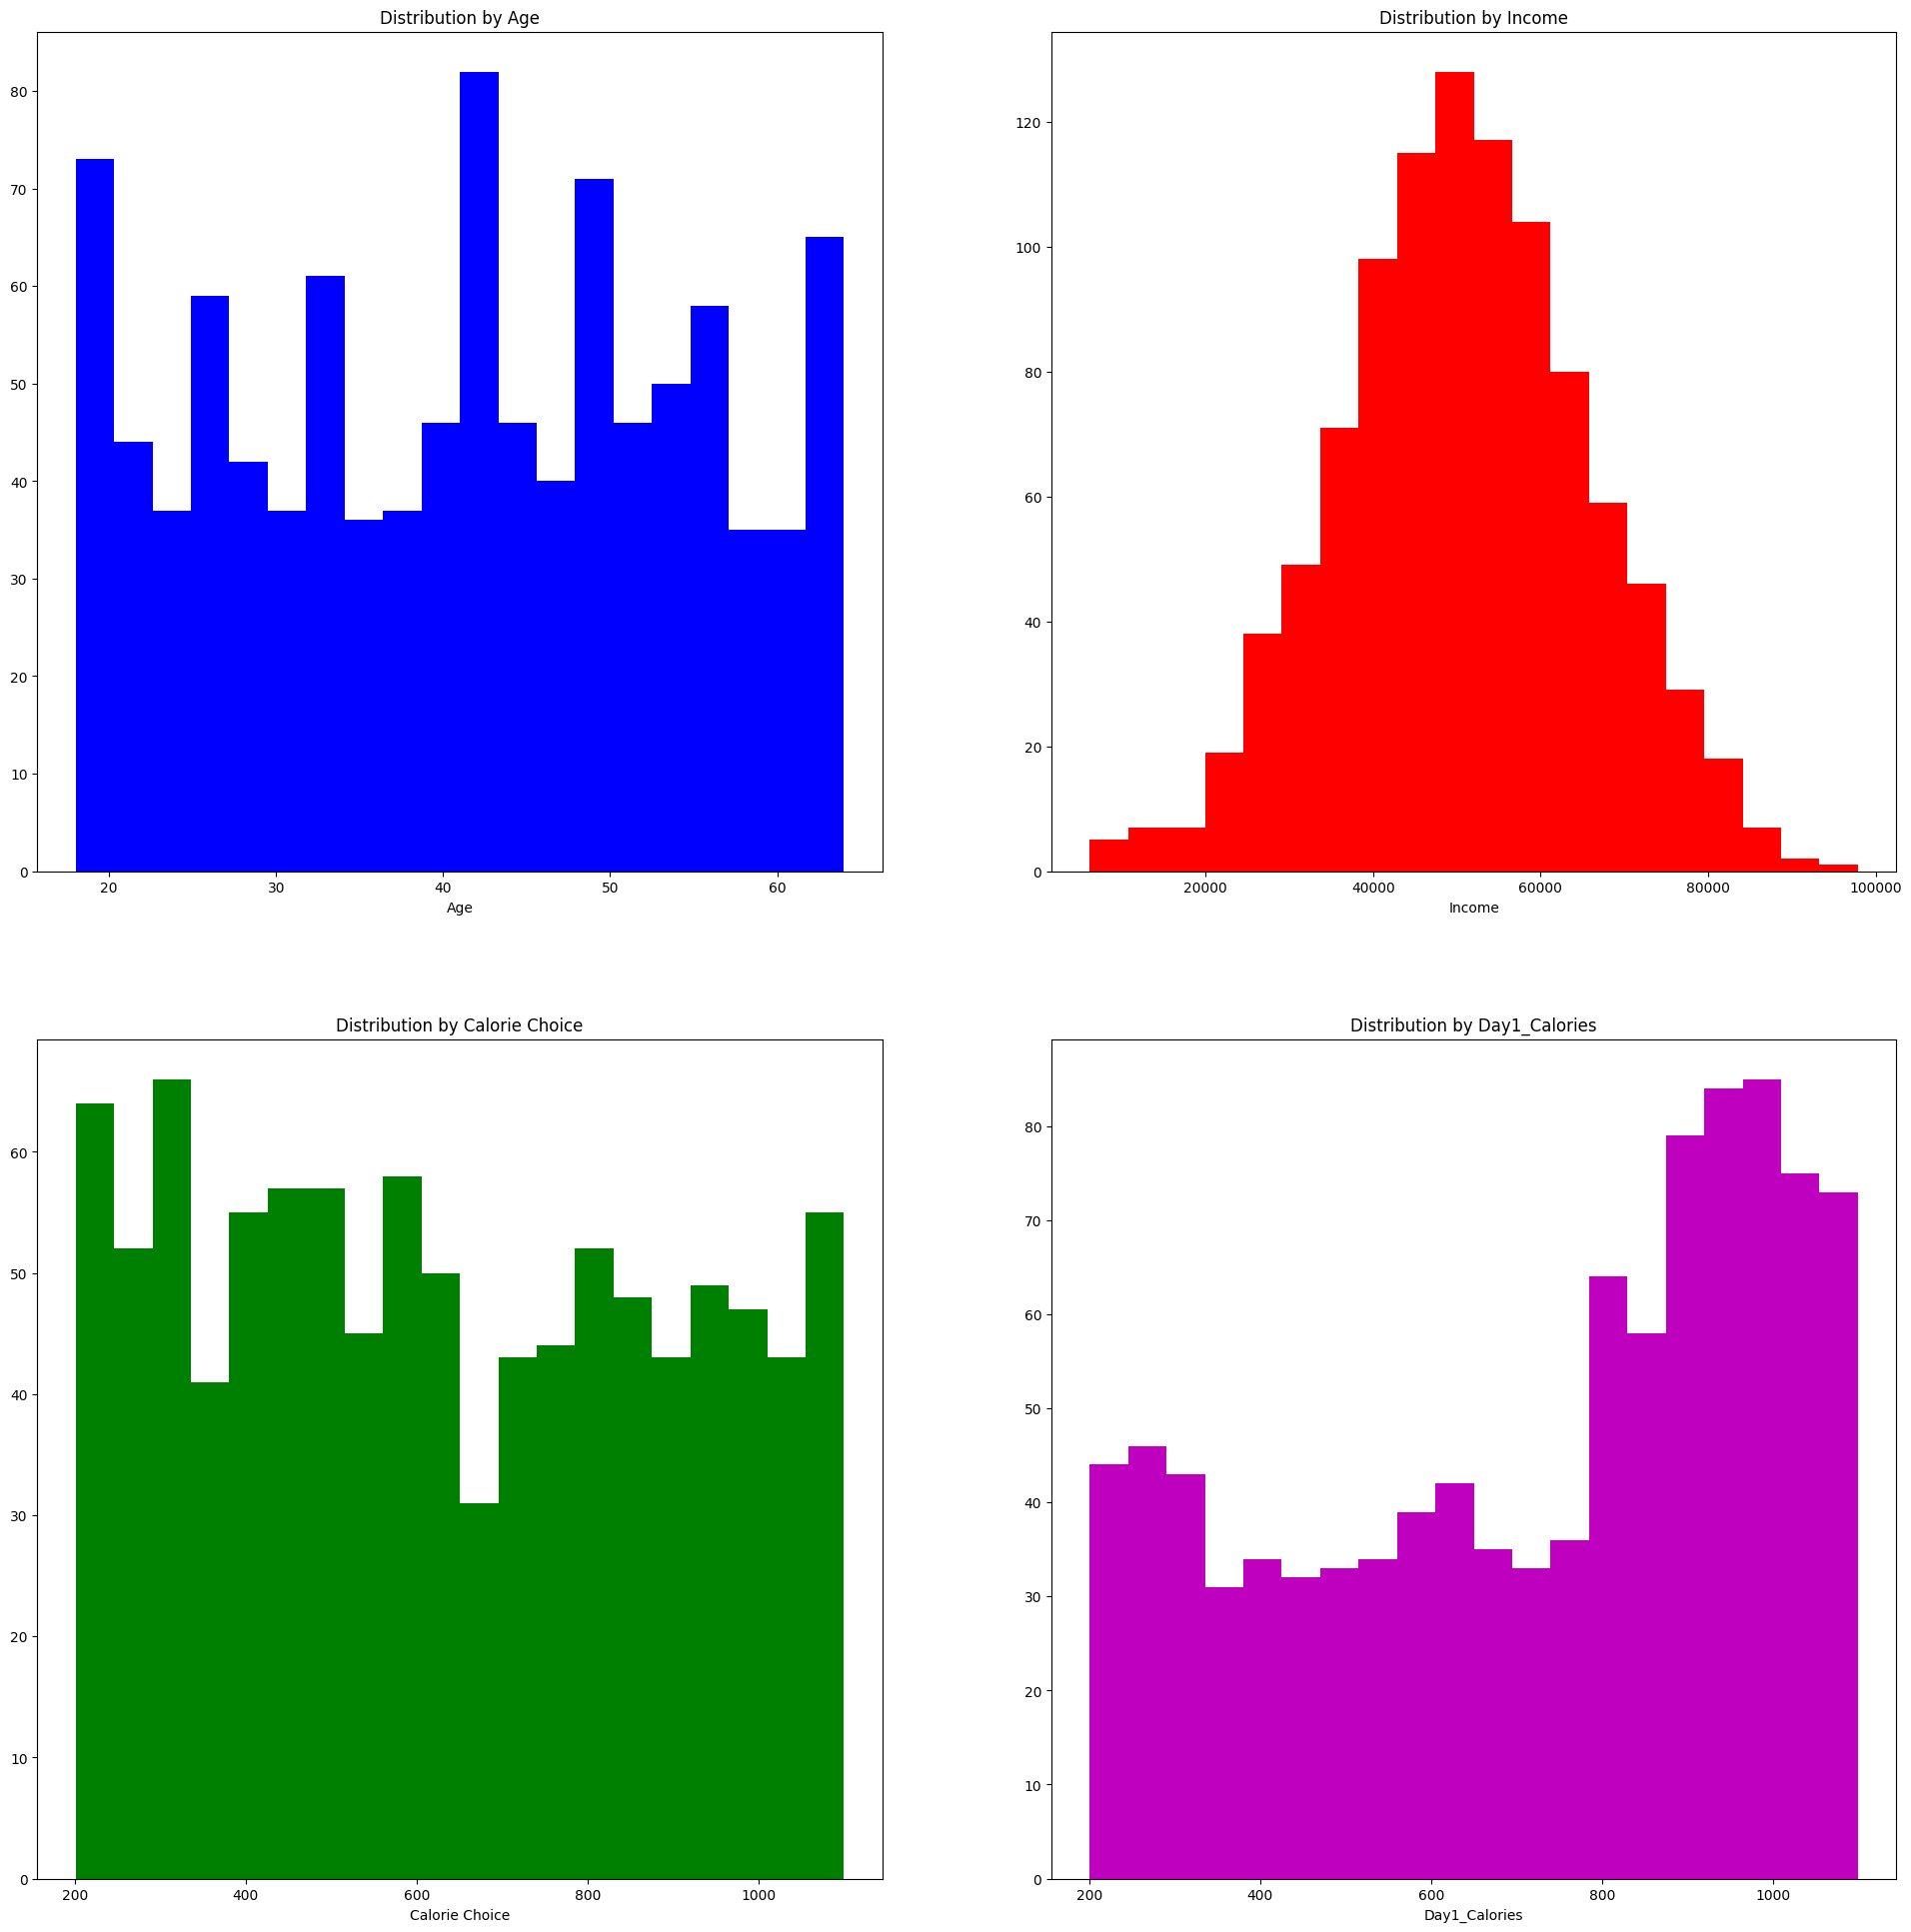

In [27]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=[24,24])
 
plt.subplot(221)
plt.hist(df['Age'],bins=20,color='b')
plt.xlabel('Age')
plt.title('Distribution by Age')
 
plt.subplot(222)
plt.hist(df['Income'],bins=20,color='r')
plt.xlabel('Income')
plt.title('Distribution by Income')
 
plt.subplot(223)
plt.hist(df['FoodChoiceCalories'],bins=20,color='g')
plt.xlabel('Calorie Choice')
plt.title('Distribution by Calorie Choice')
 
plt.subplot(224)
plt.hist(df['Day1_Calories'],bins=20,color='m')
plt.xlabel('Day1_Calories')
plt.title('Distribution by Day1_Calories')

### sns alternative ###
'''
sns.histplot(df['Age'], bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
'''


The potential outcome variable Calorie choice is not normally distributed, so may need adjusting for regression.

In [ ]:
#check distribution of gender
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a countplot to visualize the distribution of gender
sns.countplot(x='Gender', data=df)

plt.title('Distribution of Gender')
plt.show()

#try with matplotlib to make nicer

In [29]:
df.describe()

,ParticipantID,Age,Income,Day1_Calories,Day2_Calories,Day3_Calories,FoodChoiceCalories
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,500.500000,40.986000,50852.740080,724.303100,724.6975,725.817640,631.963310
std,288.819436,13.497852,15009.181783,269.333341,262.0548,271.081522,265.756564
min,1.000000,18.000000,6179.740000,200.400000,200.0600,200.280000,201.220000
25%,250.750000,29.000000,40771.042500,501.217500,501.8150,501.535000,407.572500
50%,500.500000,42.000000,50631.460000,800.060000,800.0850,800.715000,612.395000
75%,750.250000,52.000000,60797.155000,956.132500,948.0350,964.637500,864.952500
max,1000.000000,64.000000,97896.610000,1099.840000,1099.9300,1099.270000,1099.770000


Let's get the mean from the 3 days and store it in a separate column

In [45]:
df['PastCalories'] = (df['Day1_Calories']+df['Day2_Calories']+df['Day3_Calories'])/3

In [33]:
df.head()

,ParticipantID,Age,Gender,Income,Labels,Day1_Calories,Day2_Calories,Day3_Calories,FoodChoiceCalories,PastCalories
0,1,56,Male,41672.01,Low-Calorie,489.15,340.86,207.39,230.19,345.800000
1,2,46,Female,78217.36,No-Calorie,921.74,905.81,824.32,704.36,883.956667
2,3,32,Female,28279.79,Standard,923.40,936.69,951.09,825.34,937.060000
3,4,60,Female,17017.91,No-Calorie,1071.81,1061.85,996.43,916.21,1043.363333
4,5,25,Male,56600.22,Standard,425.44,240.71,419.26,506.19,361.803333


We see no correlation between the variables

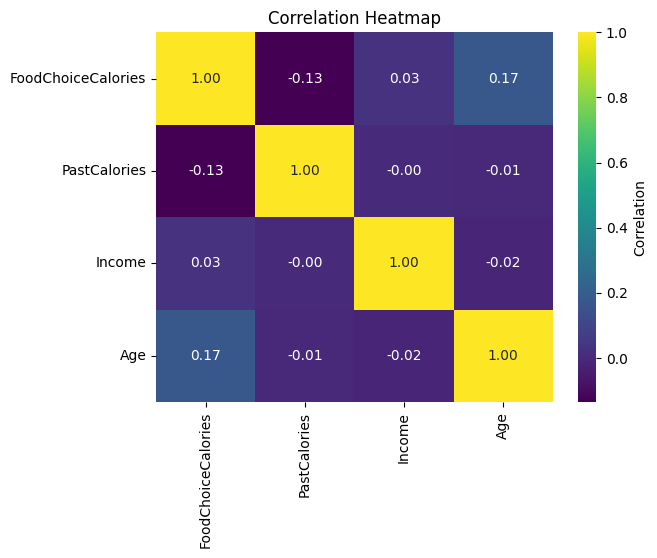

In [17]:
heatmap_data = df[['FoodChoiceCalories', 'PastCalories', 'Income', 'Age']]
sns.heatmap(heatmap_data.corr(), annot=True, cmap='viridis', fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
plt.show()

In [18]:
df

,ParticipantID,Age,Gender,Income,Labels,Day1_Calories,Day2_Calories,Day3_Calories,FoodChoiceCalories,PastCalories
0,1,56,Male,41672.01,Low-Calorie,489.15,340.86,207.39,230.19,345.800000
1,2,46,Female,78217.36,No-Calorie,921.74,905.81,824.32,704.36,883.956667
2,3,32,Female,28279.79,Standard,923.40,936.69,951.09,825.34,937.060000
3,4,60,Female,17017.91,No-Calorie,1071.81,1061.85,996.43,916.21,1043.363333
4,5,25,Male,56600.22,Standard,425.44,240.71,419.26,506.19,361.803333
...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,36209.23,No-Calorie,237.67,234.24,295.61,256.84,255.840000
996,997,40,Male,12045.69,Low-Calorie,322.31,231.90,227.39,1022.16,260.533333
997,998,27,Female,45709.94,Low-Calorie,351.39,212.59,378.21,574.11,314.063333
998,999,61,Male,66514.39,No-Calorie,907.70,821.03,1017.86,613.55,915.530000


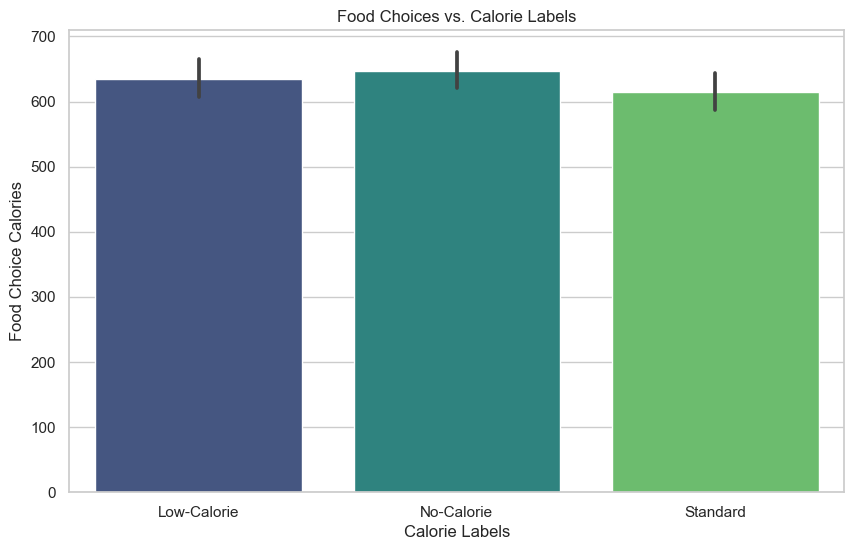

In [28]:
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Labels', y='FoodChoiceCalories', data=df, palette='viridis')

# Set titles and labels
plt.title('Food Choices vs. Calorie Labels')
plt.xlabel('Calorie Labels')
plt.ylabel('Food Choice Calories')

# Show the plot
plt.show()

In [46]:
# Get dummy columns for 'Gender'
dummy_gender_columns = pd.get_dummies(df['Gender'], prefix='Gender')

# Concatenate the original DataFrame with the dummy columns
df = pd.concat([df, dummy_gender_columns], axis=1)

df.drop('Gender_Male', axis=1, inplace=True)
df

,ParticipantID,Age,Gender,Income,Labels,Day1_Calories,Day2_Calories,Day3_Calories,FoodChoiceCalories,PastCalories,Gender_Female
0,1,56,Male,41672.01,Low-Calorie,489.15,340.86,207.39,230.19,345.800000,False
1,2,46,Female,78217.36,No-Calorie,921.74,905.81,824.32,704.36,883.956667,True
2,3,32,Female,28279.79,Standard,923.40,936.69,951.09,825.34,937.060000,True
3,4,60,Female,17017.91,No-Calorie,1071.81,1061.85,996.43,916.21,1043.363333,True
4,5,25,Male,56600.22,Standard,425.44,240.71,419.26,506.19,361.803333,False
...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,36209.23,No-Calorie,237.67,234.24,295.61,256.84,255.840000,False
996,997,40,Male,12045.69,Low-Calorie,322.31,231.90,227.39,1022.16,260.533333,False
997,998,27,Female,45709.94,Low-Calorie,351.39,212.59,378.21,574.11,314.063333,True
998,999,61,Male,66514.39,No-Calorie,907.70,821.03,1017.86,613.55,915.530000,False


In [47]:
#we need numeric data types
#we need numeric data types

#df= pd.get_dummies(df, columns=['Gender', 'Labels'], drop_first=False)
dummy_label_columns = pd.get_dummies(df['Labels'])

df = pd.concat([df, dummy_label_columns], axis=1)

df


KeyError: "['Labels_No-Calorie'] not found in axis"

In [49]:
df = df.drop('No-Calorie', axis=1)
df

,ParticipantID,Age,Gender,Income,Labels,Day1_Calories,Day2_Calories,Day3_Calories,FoodChoiceCalories,PastCalories,Gender_Female,Low-Calorie,Standard
0,1,56,Male,41672.01,Low-Calorie,489.15,340.86,207.39,230.19,345.800000,False,True,False
1,2,46,Female,78217.36,No-Calorie,921.74,905.81,824.32,704.36,883.956667,True,False,False
2,3,32,Female,28279.79,Standard,923.40,936.69,951.09,825.34,937.060000,True,False,True
3,4,60,Female,17017.91,No-Calorie,1071.81,1061.85,996.43,916.21,1043.363333,True,False,False
4,5,25,Male,56600.22,Standard,425.44,240.71,419.26,506.19,361.803333,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,36209.23,No-Calorie,237.67,234.24,295.61,256.84,255.840000,False,False,False
996,997,40,Male,12045.69,Low-Calorie,322.31,231.90,227.39,1022.16,260.533333,False,True,False
997,998,27,Female,45709.94,Low-Calorie,351.39,212.59,378.21,574.11,314.063333,True,True,False
998,999,61,Male,66514.39,No-Calorie,907.70,821.03,1017.86,613.55,915.530000,False,False,False


### Preparing data for modelling

In [52]:
#set X and y


# Assuming df is your DataFrame
X = df[['Age', 'Gender_Female', 'Income', 'PastCalories', 'Low-Calorie','Standard']]
y = df['FoodChoiceCalories']

In [53]:
from sklearn.model_selection import train_test_split
# Separating the array into input and output components
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

#### Standardise
The key is to fit the scaler only on the training set and then use that scaler to transform both the training and testing sets. This helps prevent data leakage, ensuring that the scaling parameters are learned only from the training data.

In [55]:
# Standardize the data after splitting
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [57]:
#### Model
from sklearn.linear_model import LinearRegression
# Train your plain linear regression model
model = LinearRegression()
model.fit(X_train_standardized, y_train)

# Evaluate the model on the test set
test_score = model.score(X_test_standardized, y_test)
print(f"R-squared on the test set: {test_score}")

R-squared on the test set: 0.06666588593157574


In [58]:
# Accessing coefficients
coefficients = model.coef_

# Accessing intercept
intercept = model.intercept_

# Printing coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Other metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred = model.predict(X_test_standardized)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Coefficients: [ 42.48666709 -17.15828674  13.7278421  -32.3970108   -1.36013837
   2.10836462]
Intercept: 633.6827125000001
Mean Squared Error: 64179.80274695694
Mean Absolute Error: 219.56798082774293


In [59]:
### For detailed statistics use, statsmodel
!pip install statsmodels


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
import statsmodels.api as sm

# Add a constant term to the features matrix
X_train_constant = sm.add_constant(X_train_standardized)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train_constant).fit()

# Get the summary of the OLS model



print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:     FoodChoiceCalories   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     6.622
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           7.61e-07
Time:                        22:07:54   Log-Likelihood:                -5583.7
No. Observations:                 800   AIC:                         1.118e+04
Df Residuals:                     793   BIC:                         1.121e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        633.6827      9.233     68.632      0.0

If you find that your overall model is poor, you may want to investigate further and possibly make improvements. Here are some steps you can take:

Variable Selection:

Check if all the variables included in your model are necessary. Are there variables that don't contribute significantly to the model? Removing non-significant variables might improve the model.
Model Assumptions:

Check the assumptions of linear regression, such as linearity, independence of errors, homoscedasticity, and normality of residuals. If these assumptions are violated, it can impact the model's performance.
Transformations:

Consider transforming variables (e.g., logarithmic transformations) if their relationships with the dependent variable are not linear.
Feature Engineering:

Create new features or interactions between variables that might better capture the relationship with the dependent variable.
Outlier Detection:

Identify and investigate outliers. Outliers can have a significant impact on regression models.
Multicollinearity:

Check for multicollinearity among predictors. High correlation between predictors can affect the stability and interpretability of coefficients.
Cross-Validation:

Use cross-validation techniques to evaluate the model's performance on different subsets of the data. This helps ensure that the model generalizes well to new data.
Try Other Models:

Linear regression assumes a linear relationship between predictors and the dependent variable. If this assumption doesn't hold, consider trying other regression models, such as polynomial regression, decision trees, or ensemble methods.
Regularization:

Consider using regularization techniques (e.g., Ridge or Lasso regression) to prevent overfitting and improve model generalization.
Collect More Data:

If feasible, collecting more data might help improve the model's performance, especially if the dataset is small.

In [48]:
print(df.dtypes)


ParticipantID            int64
Age                      int32
Gender                  object
PastDietaryBehavior      int32
Income                 float64
Labels                  object
FoodChoiceRating         int32
dtype: object


In [129]:
#we need numeric data types

df= pd.get_dummies(df, columns=['Gender', 'Labels'], drop_first=False)
df = df.drop('Gender_Female', axis=1)


In [81]:
df

,ParticipantID,Age,PastDietaryBehavior,Income,FoodChoiceRating,Gender_Male,Labels_Low-Calorie,Labels_No-Calorie,Labels_Standard
0,1,56,2,35354.37,2,True,False,False,True
1,2,46,2,36613.16,4,False,True,False,False
2,3,32,2,55325.34,4,False,False,False,True
3,4,60,2,46683.30,2,False,False,True,False
4,5,25,5,37395.78,2,True,False,True,False
...,...,...,...,...,...,...,...,...,...
995,996,22,1,64377.15,3,True,True,False,False
996,997,40,4,33553.96,2,True,False,False,True
997,998,27,5,62573.55,2,False,False,True,False
998,999,61,4,68667.47,2,True,False,True,False


In [130]:
df = df.drop('Labels_No-Calorie', axis=1)


In [131]:
print(df.dtypes)
df['Gender_Male'] = df['Gender_Male'].astype(int)
df['Labels_Low-Calorie'] = df['Labels_Low-Calorie'].astype(int)
df['Labels_Standard'] = df['Labels_Standard'].astype(int)


ParticipantID            int64
Age                      int32
PastDietaryBehavior      int32
Income                 float64
FoodChoiceRating         int32
Gender_Male               bool
Labels_Low-Calorie        bool
Labels_Standard           bool
dtype: object


In [134]:

import statsmodels.api as sm

# Create interaction terms
df['Interaction_Age_LowCalorie'] = df['Age'] * df['Labels_Low-Calorie']
df['Interaction_Age_Standard'] = df['Age'] * df['Labels_Standard']
df['Interaction_Gender_LowCalorie'] = df['Gender_Male'] * df['Labels_Low-Calorie']



# Fit linear regression model with interactions
X = sm.add_constant(df[['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'PastDietaryBehavior',
                        'Interaction_Age_LowCalorie', 'Interaction_Age_Standard', 'Interaction_Gender_LowCalorie']])
y = df['FoodChoiceRating']

linear_model = sm.OLS(y, X)
result = linear_model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       FoodChoiceRating   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.378
Date:                Wed, 31 Jan 2024   Prob (F-statistic):             0.0154
Time:                        13:37:21   Log-Likelihood:                -1756.6
No. Observations:                1000   AIC:                             3531.
Df Residuals:                     991   BIC:                             3575.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Model Summary

**Dependent Variable**: FoodChoiceRating

**R-squared**: The coefficient of determination, representing the proportion of the variance in the dependent variable that is predictable from the independent variables. In your case, it's quite low (0.024), indicating that the model explains a small portion of the variance in FoodChoiceRating.

**Adjusted R-squared**: Similar to R-squared but adjusted for the number of predictors. It's 0.020.

**F-statistic**: A test statistic for the overall significance of the model. The associated p-value is low (0.000161), suggesting that at least one of the independent variables is statistically significant.

### Coefficients Table:
* const (Intercept): The intercept term. When all other variables are zero, the estimated mean value of FoodChoiceRating is 3.9411.

* Age: A one-unit increase in Age is associated with a decrease of 0.0084 units in FoodChoiceRating. This effect is statistically significant (p-value: 0.011).

* Gender_Male: Being male is associated with a decrease of 0.2549 units in FoodChoiceRating compared to being female. This effect is statistically significant (p-value: 0.004).

* Labels_No-Calorie: The coefficient suggests a decrease of 0.0175 units in FoodChoiceRating for Labels_No-Calorie, but it's not statistically significant (p-value: 0.870).

* Labels_Standard: The coefficient suggests an increase of 0.0552 units in FoodChoiceRating for Labels_Standard, but it's not statistically significant (p-value: 0.615).

* PastDietaryBehavior: A one-unit increase in PastDietaryBehavior is associated with a decrease of 0.0980 units in FoodChoiceRating. This effect is statistically significant (p-value: 0.002).

### Additional Information:

* Omnibus: A test of the normality of the residuals. A low p-value (0.000) suggests that the residuals are not normally distributed.

* Durbin-Watson: A test for the presence of autocorrelation in the residuals. The value of 1.954 suggests little autocorrelation.

* Jarque-Bera (JB): Another test of normality. A low p-value (2.37e-14) indicates non-normality.

* Skew: A measure of the asymmetry of the residuals. Close to zero suggests symmetry.

* Kurtosis: A measure of the "tailedness" of the residuals. A value of 1.820 indicates relatively mild tails.

### Interpretation:

* The model suggests that Age, Gender, and PastDietaryBehavior are statistically significant predictors of FoodChoiceRating.

* The variables Labels_No-Calorie and Labels_Standard do not seem to have a statistically significant impact on FoodChoiceRating in this model.

* The low R-squared suggests that there may be other factors not included in the model that also influence FoodChoiceRating.

In [106]:
#let's create a composite behaviour change metric
df['behaviour_change'] = df['FoodChoiceRating']-df['PastDietaryBehavior']

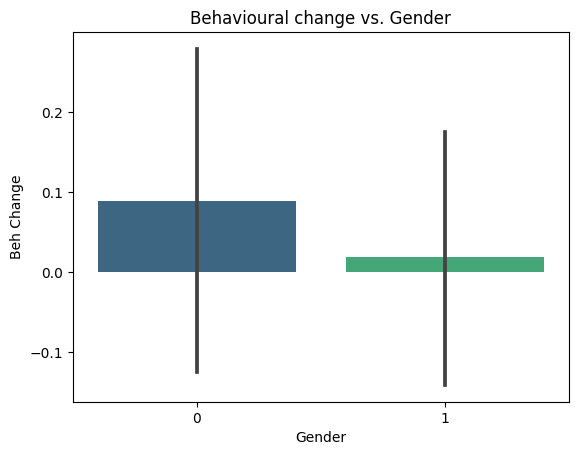

In [109]:
sns.barplot(x='Gender_Male', y='behaviour_change', data=df, palette='viridis')

plt.title('Behavioural change vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Beh Change')
plt.show()

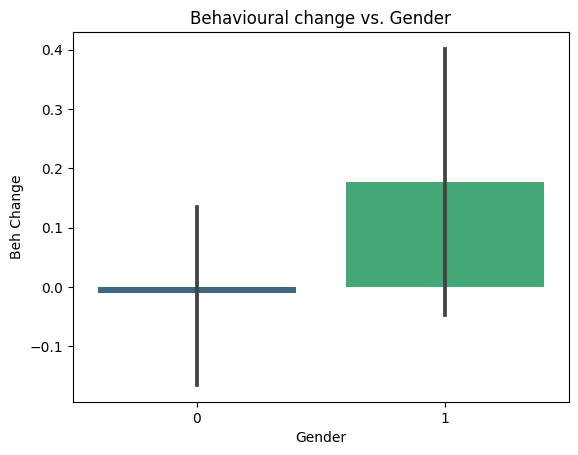

In [111]:
sns.barplot(x='Labels_Low-Calorie', y='behaviour_change', data=df, palette='viridis')

plt.title('Behavioural change vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Beh Change')
plt.show()

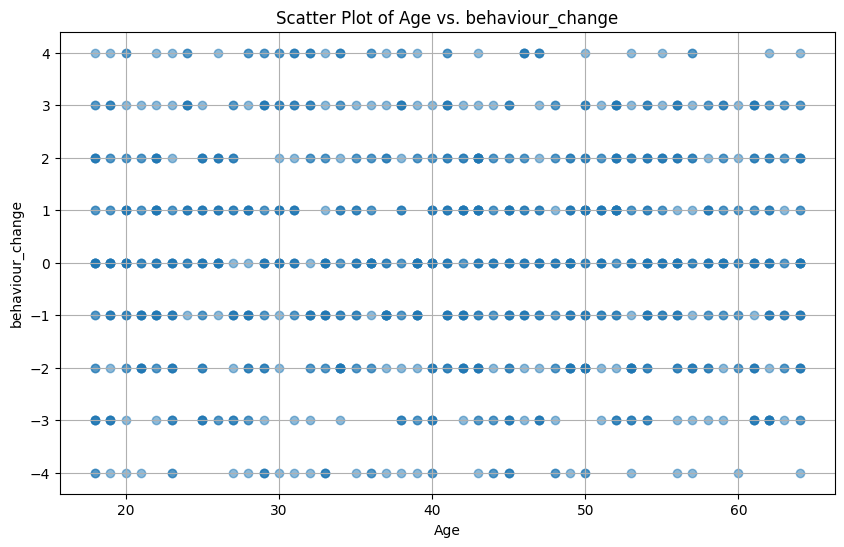

In [112]:
import matplotlib.pyplot as plt

# Assuming df_regression is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['behaviour_change'], alpha=0.5)
plt.title('Scatter Plot of Age vs. behaviour_change')
plt.xlabel('Age')
plt.ylabel('behaviour_change')
plt.grid(True)
plt.show()

In [108]:
import statsmodels.api as sm




# Add interaction terms
#df['Interaction_Age_Gender'] = df['Age'] * (df['Gender_Male'] == 0)
#df['Interaction_LowCalorie_Gender'] = df['Labels_Low-Calorie'] * (df['Gender_Male'] == 0)
df['Interaction_Age_Gender'] =  (df['Gender_Male'] == 0)*df['Age'] 


# Fit the multiple linear regression model
# Fit linear regression model with interactions
X = sm.add_constant(df[['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard',  'Interaction_Age_Gender']])
y = df['behaviour_change']

linear_model = sm.OLS(y, X)
result = linear_model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       behaviour_change   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5924
Date:                Tue, 30 Jan 2024   Prob (F-statistic):              0.706
Time:                        22:05:12   Log-Likelihood:                -2134.4
No. Observations:                1000   AIC:                             4281.
Df Residuals:                     994   BIC:                             4310.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [116]:
!pip install mord
import mord


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9896 sha256=f3eb1688a6c50d6502d895bf5e9cc40c6f9b5ba3d763741dbd79e1d14d420568
  Stored in directory: c:\users\karol\appdata\local\pip\cache\wheels\d1\fc\57\f2a2ad4ed0491ab6d5bb8642a90f1da9469397641e914743da
Successfully built mord


In [126]:
X = df[['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'PastDietaryBehavior',
                        'Interaction_Age_LowCalorie', 'Interaction_Age_Standard', 'Interaction_Gender_LowCalorie']]
y = df['FoodChoiceRating']

# Convert 'Gender' to numeric (1 for Female, 0 for Male)

# Fit ordered logistic regression model
model = mord.OrdinalRidge(alpha=1.0)  # You can adjust the alpha parameter
model.fit(X, y)

# Display coefficients
#print("Coefficients:", model.coef_)

# Predictions
predictions = model.predict(X)
#print("Predictions:", predictions)

C:\Users\karol\myvenv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


In [138]:
df['behaviour_change'] = df['FoodChoiceRating']-df['PastDietaryBehavior']

In [121]:
df['behaviour_change_binary'] = (df['behaviour_change'] > 0).astype(int)


In [122]:
df

,ParticipantID,Age,PastDietaryBehavior,Income,FoodChoiceRating,Gender_Male,Labels_Low-Calorie,Labels_Standard,Interaction_Age_LowCalorie,Interaction_Age_Standard,Interaction_Gender_LowCalorie,Interaction_LowCalorie_Gender,behaviour_change,Interaction_Age_Gender,behaviour_change_binary
0,1,56,2,35354.37,2,1,0,1,0,56,0,0,0,0,0
1,2,46,2,36613.16,4,0,1,0,46,0,0,46,2,46,1
2,3,32,2,55325.34,1,0,0,1,0,32,0,0,-1,32,0
3,4,60,2,46683.30,2,0,0,0,0,0,0,0,0,60,0
4,5,25,5,37395.78,2,1,0,0,0,0,0,0,-3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,1,64377.15,3,1,1,0,22,0,1,0,2,0,1
996,997,40,4,33553.96,2,1,0,1,0,40,0,0,-2,0,0
997,998,27,5,62573.55,2,0,0,0,0,0,0,0,-3,27,0
998,999,61,4,68667.47,2,1,0,0,0,0,0,0,-2,0,0


In [ ]:
#https://analyticsindiamag.com/a-complete-tutorial-on-ordinal-regression-in-python/

In [125]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame
# Make sure 'FoodChoiceRating' is binary (0 or 1)

# Select relevant columns for the model
X = df[['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'Interaction_Gender_LowCalorie']]
y = df['behaviour_change_binary']



# Add constant term for intercept
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
results = model.fit()

# Display summary including p-values
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.673309
         Iterations 4
                              Logit Regression Results                             
Dep. Variable:     behaviour_change_binary   No. Observations:                 1000
Model:                               Logit   Df Residuals:                      994
Method:                                MLE   Df Model:                            5
Date:                     Tue, 30 Jan 2024   Pseudo R-squ.:                0.001335
Time:                             22:43:51   Log-Likelihood:                -673.31
converged:                            True   LL-Null:                       -674.21
Covariance Type:                 nonrobust   LLR p-value:                    0.8760
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         

In [135]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
mod_prob = OrderedModel(df['FoodChoiceRating'],
                        df[['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'PastDietaryBehavior',
                        'Interaction_Age_LowCalorie', 'Interaction_Age_Standard', 'Interaction_Gender_LowCalorie']],
                        distr='probit')

In [136]:
res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.595681
         Iterations: 39
         Function evaluations: 43
         Gradient evaluations: 43


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:       FoodChoiceRating   Log-Likelihood:                -1595.7
Model:                   OrderedModel   AIC:                             3215.
Method:            Maximum Likelihood   BIC:                             3274.
Date:                Wed, 31 Jan 2024                                         
Time:                        13:37:55                                         
No. Observations:                1000                                         
Df Residuals:                     988                                         
Df Model:                           8                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Age                              -0.0010      0.004     -0.244      0.807      -0.009       0.007
Gender_Male                       0.0921      0.083      1.110      0.267      -0.070       0.255
Labels_Low-Calorie                0.6649      0.271      2.452      0.014       0.133       1.196
Labels_Standard                  -0.0236      0.259     -0.091      0.927      -0.532       0.485
PastDietaryBehavior              -0.0354      0.024     -1.504      0.133      -0.082       0.011
Interaction_Age_LowCalorie       -0.0062      0.006     -1.045      0.296      -0.018       0.005
Interaction_Age_Standard          0.0006      0.006      0.097      0.923      -0.011       0.013
Interaction_Gender_LowCalorie    -0.5142      0.144     -3.575      0.000      -0.796      -0.232
1/2                              -0.9900      0.193     -5.123      0.000      -1.369      -0.611
2/3                              -0.5066      0.065     -7.774      0.000      -0.634      -0.379
3/4                              -0.6743      0.065    -10.409      0.000      -0.801      -0.547
4/5                              -0.5444      0.064     -8.510      0.000      -0.670      -0.419
=================================================================================================
"""

                            OLS Regression Results                            
Dep. Variable:       behaviour_change   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.139
Date:                Tue, 30 Jan 2024   Prob (F-statistic):              0.337
Time:                        14:28:00   Log-Likelihood:                -2157.5
No. Observations:                1000   AIC:                             4325.
Df Residuals:                     995   BIC:                             4349.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5116      0.24

In [55]:
np_data = np.asarray(df)
np_data

array([[1, 56, 2, ..., True, False, True],
       [2, 46, 2, ..., False, False, False],
       [3, 32, 2, ..., False, False, True],
       ...,
       [998, 27, 5, ..., False, True, False],
       [999, 61, 4, ..., True, True, False],
       [1000, 19, 2, ..., True, False, True]], dtype=object)

In [ ]:
#https://365datascience.com/tutorials/python-tutorials/build-customer-segmentation-models/

In [139]:
#try segmentation
df_seg = df[['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'behaviour_change']]

Age: 


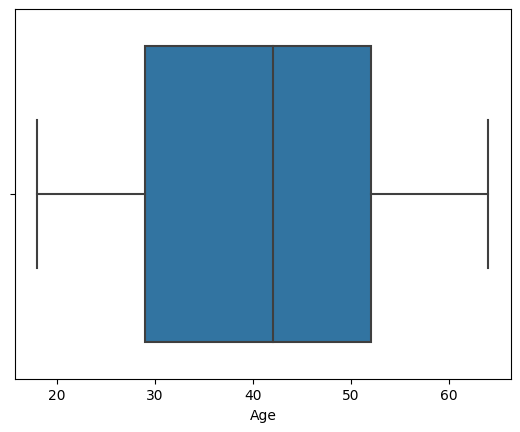

Gender_Male: 


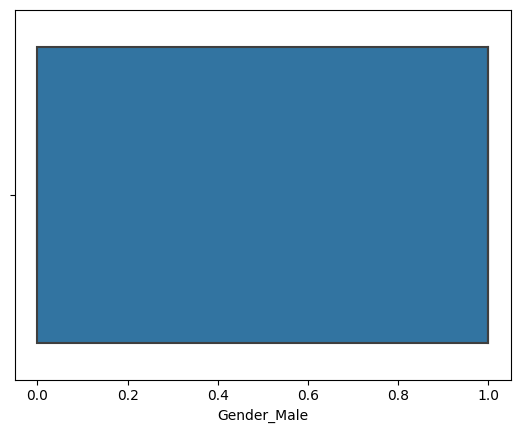

Labels_Low-Calorie: 


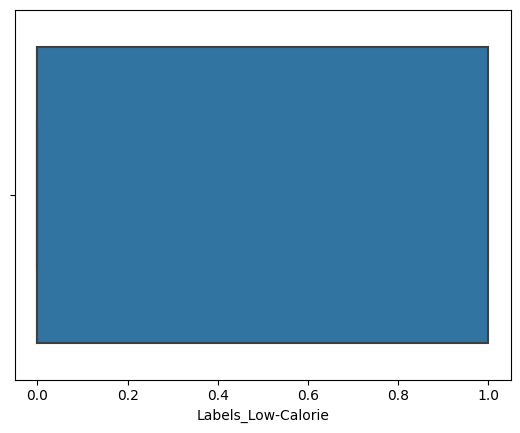

Labels_Standard: 


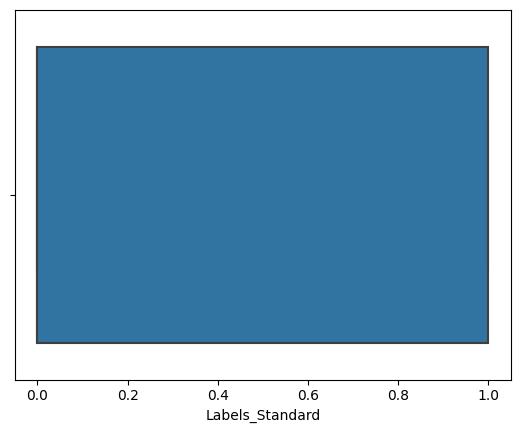

behaviour_change: 


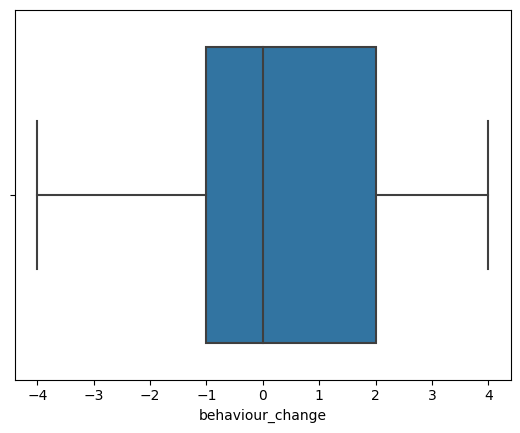

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'behaviour_change']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=df_seg[str(i)])
    plt.show()

In [ ]:
#standardize

In [142]:
from sklearn.preprocessing import StandardScaler
#new_df = new_df.drop_duplicates()
col_names = ['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'behaviour_change']
features = df_seg[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [143]:
scaled_features

,Age,Gender_Male,Labels_Low-Calorie,Labels_Standard,behaviour_change
0,1.112882,0.949284,-0.708168,1.471243,-0.025388
1,0.371652,-1.053425,1.412095,-0.679697,0.951059
2,-0.666069,-1.053425,-0.708168,1.471243,-0.513611
3,1.409373,-1.053425,-0.708168,-0.679697,-0.025388
4,-1.184929,0.949284,-0.708168,-0.679697,-1.490058
...,...,...,...,...,...
995,-1.407298,0.949284,1.412095,-0.679697,0.951059
996,-0.073085,0.949284,-0.708168,1.471243,-1.001835
997,-1.036683,-1.053425,-0.708168,-0.679697,-1.490058
998,1.483496,0.949284,-0.708168,-0.679697,-1.001835


C:\Users\karol\myvenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karol\myvenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karol\myvenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karol\myvenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0, 0.5, 'Inertia')

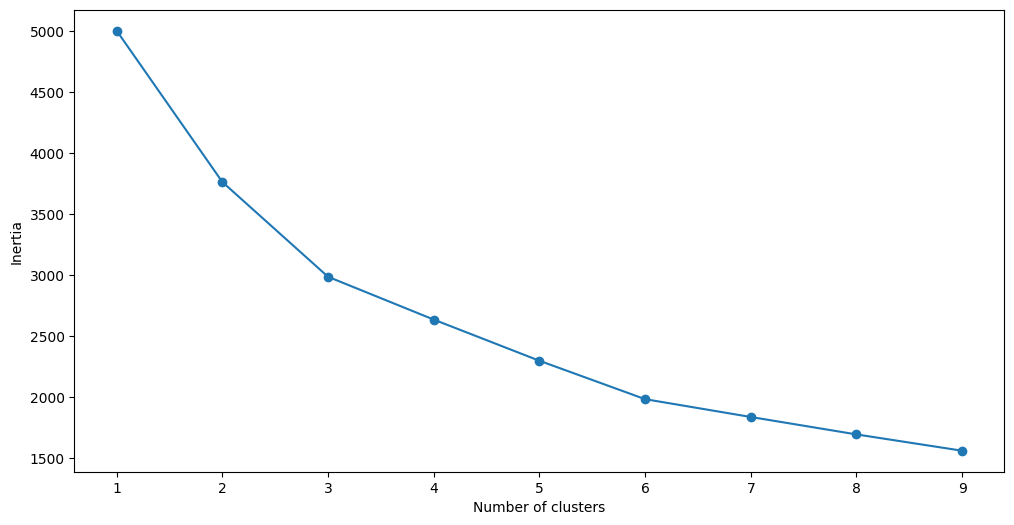

In [144]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
#hmm 3 or 6 clusters

In [156]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 6, init='k-means++')
kmeans.fit(scaled_features)
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))


0.3574076070788245


C:\Users\karol\myvenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [157]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(df_seg)
frame['cluster'] = pred

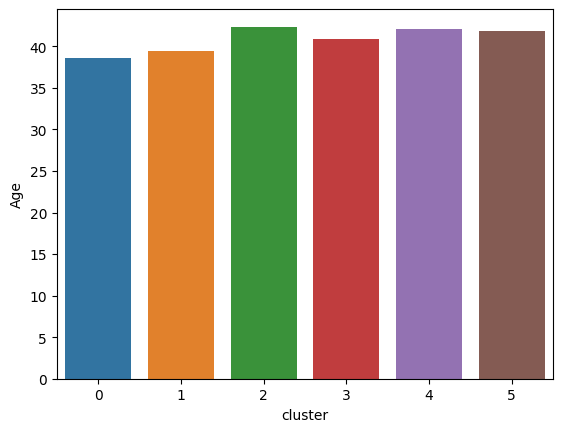

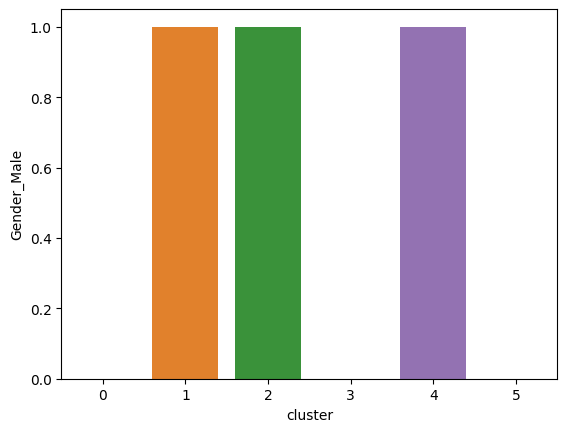

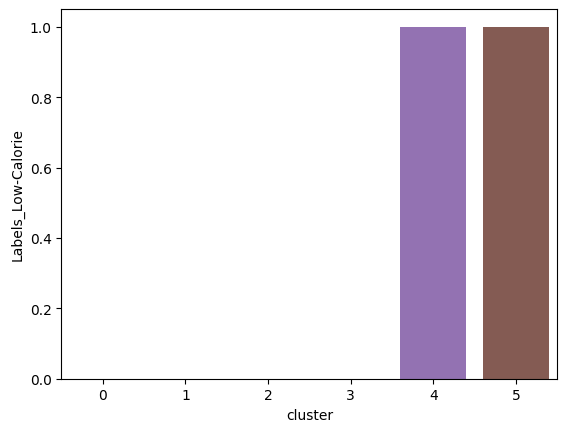

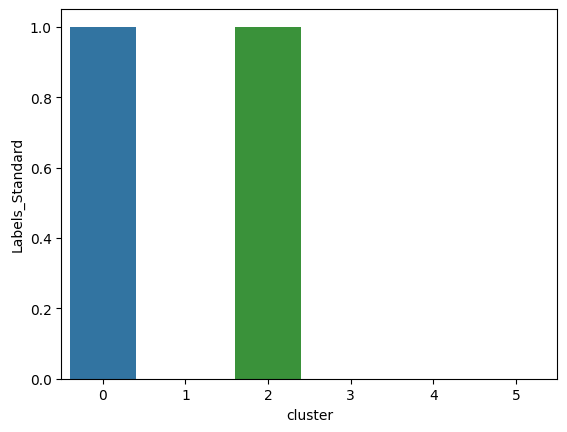

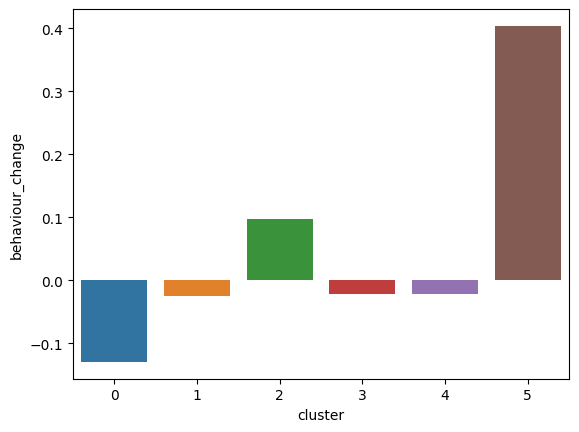

In [158]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

In [ ]:
#https://365datascience.com/tutorials/python-tutorials/build-customer-segmentation-models/

In [19]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Mock data for participants
num_participants = 1000
participant_ids = range(1, num_participants + 1)
ages = np.random.randint(18, 65, size=num_participants)
genders = np.random.choice(['Male', 'Female'], size=num_participants)
incomes = np.random.normal(50000, 15000, size=num_participants).round(2)  # Generating random income values

# Creating DataFrame
df = pd.DataFrame({
    'ParticipantID': participant_ids,
    'Age': ages,
    'Gender': genders,
    'Income': incomes
})

# Generating continuous values for 3 days' worth of calorie data for food orders
calorie_means = {'Low': np.random.uniform(200, 500, size=num_participants),
                 'Medium': np.random.uniform(500, 800, size=num_participants),
                 'High': np.random.uniform(800, 1100, size=num_participants)}

# Initialize columns for each day
df['Day1_Calories'] = 0
df['Day2_Calories'] = 0
df['Day3_Calories'] = 0

# Calculate the number of participants for each category
num_low = int(0.25 * num_participants)
num_medium = int(0.25 * num_participants)
num_high = int(0.5 * num_participants)

# Assign fixed values for low category for each day
low_indices = np.random.choice(range(num_participants), size=(num_low,), replace=False)
df.loc[low_indices, 'Day1_Calories'] = 250
df.loc[low_indices, 'Day2_Calories'] = 300
df.loc[low_indices, 'Day3_Calories'] = 400

# Assign fixed values for medium category for each day
medium_indices = np.random.choice(list(set(range(num_participants)) - set(low_indices)), size=(num_medium,), replace=False)
df.loc[medium_indices, 'Day1_Calories'] = 500
df.loc[medium_indices, 'Day2_Calories'] = 600
df.loc[medium_indices, 'Day3_Calories'] = 700

# Assign fixed values for high category for each day
high_indices = np.random.choice(list(set(range(num_participants)) - set(low_indices) - set(medium_indices)), size=(num_high,), replace=False)
df.loc[high_indices, 'Day1_Calories'] = 800
df.loc[high_indices, 'Day2_Calories'] = 900
df.loc[high_indices, 'Day3_Calories'] = 1000

# Displaying the modified DataFrame
print(df.head())

   ParticipantID  Age  Gender    Income  Day1_Calories  Day2_Calories  \
0              1   56    Male  41672.01            500            600   
1              2   46  Female  78217.36            500            600   
2              3   32  Female  28279.79            500            600   
3              4   60  Female  17017.91            250            300   
4              5   25    Male  56600.22            250            300   

   Day3_Calories  
0            700  
1            700  
2            700  
3            400  
4            400  


In [24]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Mock data for participants
num_participants = 1000
participant_ids = range(1, num_participants + 1)
ages = np.random.randint(18, 65, size=num_participants)
genders = np.random.choice(['Male', 'Female'], size=num_participants)
incomes = np.random.normal(50000, 15000, size=num_participants).round(2)  # Generating random income values


# Calorie label types
calorie_label_types = ['Standard', 'Low-Calorie', 'No-Calorie']

# Food choices based on calorie labels
calorie_labels = np.random.choice(calorie_label_types, size=num_participants)

# Creating DataFrame
df = pd.DataFrame({
    'ParticipantID': participant_ids,
    'Age': ages,
    'Gender': genders,
    'Income': incomes,
    'Labels': calorie_labels
})

# Generating continuous values for 3 days' worth of calorie data for food orders
calorie_ranges = {'Low': (200, 500),
                  'Medium': (500, 800),
                  'High': (800, 1100)}

# Initialize columns for each day
df['Day1_Calories'] = 0
df['Day2_Calories'] = 0
df['Day3_Calories'] = 0

# Calculate the number of participants for each category
num_low = int(0.25 * num_participants)
num_medium = int(0.25 * num_participants)
num_high = int(0.5 * num_participants)

# Assign random values for low category for each day
low_indices = np.random.choice(range(num_participants), size=(num_low,), replace=False)
df.loc[low_indices, 'Day1_Calories'] = np.random.uniform(*calorie_ranges['Low'], size=num_low).round(2)
df.loc[low_indices, 'Day2_Calories'] = np.random.uniform(*calorie_ranges['Low'], size=num_low).round(2)
df.loc[low_indices, 'Day3_Calories'] = np.random.uniform(*calorie_ranges['Low'], size=num_low).round(2)

# Assign random values for medium category for each day
medium_indices = np.random.choice(list(set(range(num_participants)) - set(low_indices)), size=(num_medium,), replace=False)
df.loc[medium_indices, 'Day1_Calories'] = np.random.uniform(*calorie_ranges['Medium'], size=num_medium).round(2)
df.loc[medium_indices, 'Day2_Calories'] = np.random.uniform(*calorie_ranges['Medium'], size=num_medium).round(2)
df.loc[medium_indices, 'Day3_Calories'] = np.random.uniform(*calorie_ranges['Medium'], size=num_medium).round(2)

# Assign random values for high category for each day
high_indices = np.random.choice(list(set(range(num_participants)) - set(low_indices) - set(medium_indices)), size=(num_high,), replace=False)
df.loc[high_indices, 'Day1_Calories'] = np.random.uniform(*calorie_ranges['High'], size=num_high).round(2)
df.loc[high_indices, 'Day2_Calories'] = np.random.uniform(*calorie_ranges['High'], size=num_high).round(2)
df.loc[high_indices, 'Day3_Calories'] = np.random.uniform(*calorie_ranges['High'], size=num_high).round(2)

# Adding continuous values for 'FoodChoiceCalories'
df['FoodChoiceCalories'] = np.random.uniform(200, 1100, size=num_participants).round(2)

# Conditionally changing 'FoodChoiceCalories' based on criteria
young_women_condition = (df['Gender'] == 'Female') & (df['Age'] < 30) & (df['Day1_Calories'] > 700)
df.loc[young_women_condition, 'FoodChoiceCalories'] = np.random.uniform(200, 500, size=sum(young_women_condition)).round(2)



# Displaying the modified DataFrame
print(df.head())

   ParticipantID  Age  Gender    Income       Labels  Day1_Calories  \
0              1   56    Male  41672.01  Low-Calorie         489.15   
1              2   46  Female  78217.36   No-Calorie         921.74   
2              3   32  Female  28279.79     Standard         923.40   
3              4   60  Female  17017.91   No-Calorie        1071.81   
4              5   25    Male  56600.22     Standard         425.44   

   Day2_Calories  Day3_Calories  FoodChoiceCalories  
0         340.86         207.39              230.19  
1         905.81         824.32              704.36  
2         936.69         951.09              825.34  
3        1061.85         996.43              916.21  
4         240.71         419.26              506.19  
